# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [228]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [229]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [230]:
# Shape
df_dsa.shape

(9700, 11)

In [231]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [232]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [233]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [234]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [235]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [236]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [237]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [238]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [239]:
df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby(['Cidade'])['Valor_Venda'].sum().sort_values().idxmax()
#Resposta Detroit

'New York City'

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

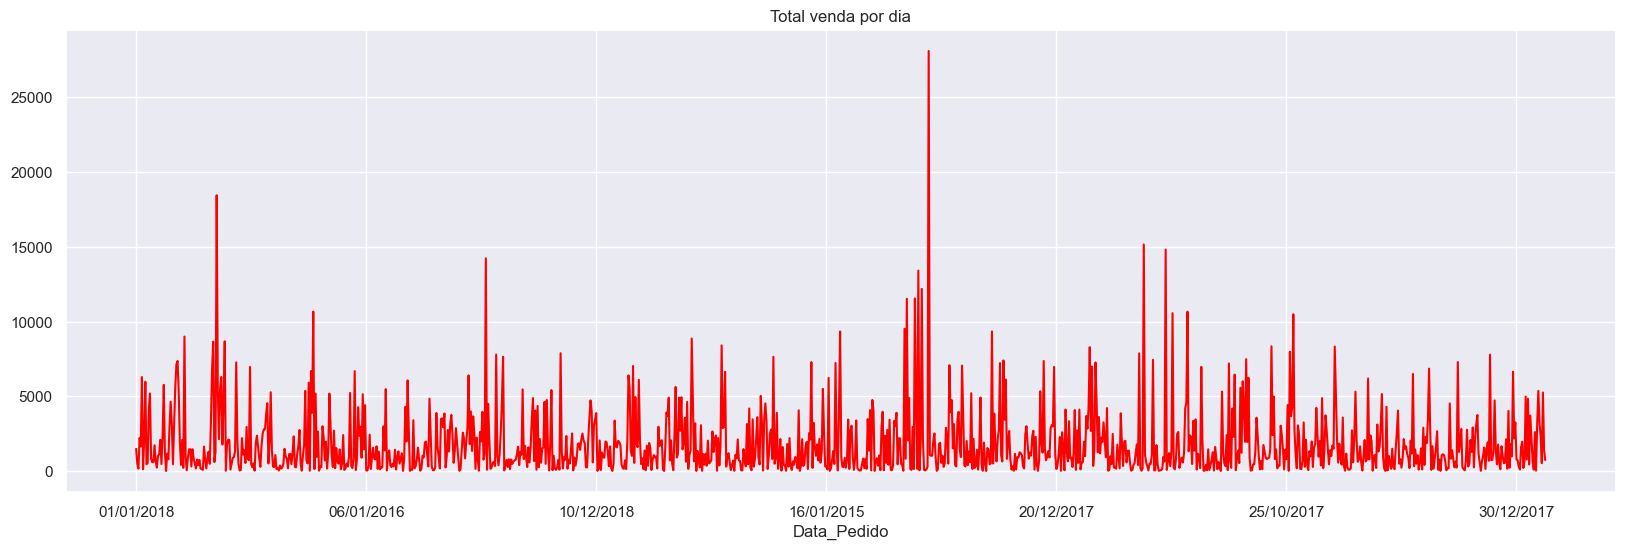

In [240]:
df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

df_filter = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

#Plot
plt.figure(figsize=(20, 6))
df_filter.plot( x = "Data Pedidos", y = "Valor_Venda", color= 'Red')
plt.title('Total venda por dia')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

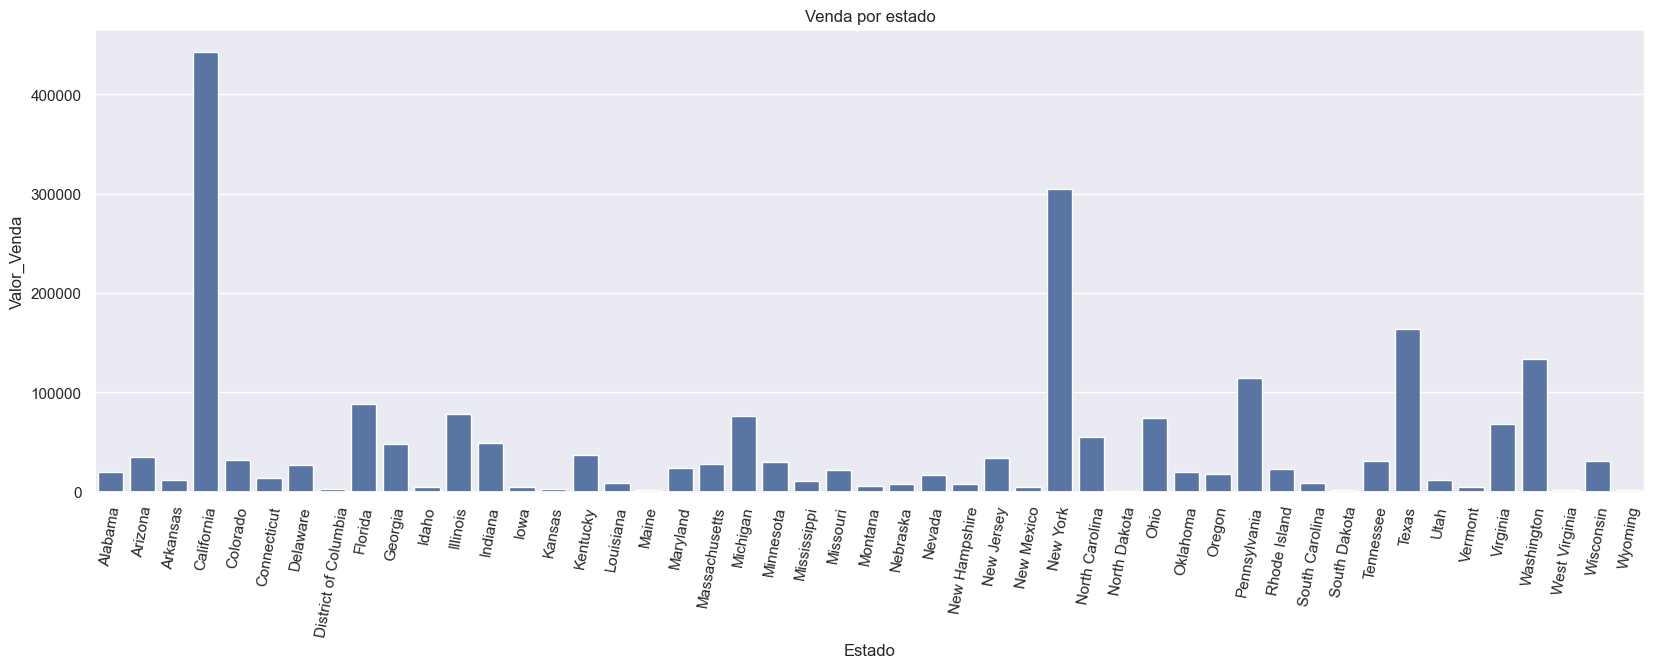

In [241]:
#reseta o index, transforma o resultado da query em um novo DF ou Serie
df_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

#Plot
plt.figure(figsize=(20, 6))
sns.barplot(data=df_estado,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Venda por estado')

#Fala quantos ticks, ou marcações o grafico terá
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [242]:
df_10_cidades = df_dsa.groupby('Cidade')[['Valor_Venda']].sum().reset_index().sort_values(by=['Valor_Venda'], ascending=False).head(10)
df_10_cidades.head()

,Cidade,Valor_Venda
327,New York City,251749.219
265,Los Angeles,171654.633
450,Seattle,114725.478
436,San Francisco,107489.952
372,Philadelphia,107197.803


## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

([<matplotlib.patches.Wedge at 0x210cb8ce750>,
 [Text(-1.2996691181970281, -0.029328880049535874, 'Consumer'),
  Text(1.09365867756983, -0.7027878036621087, 'Corporate'),
  Text(0.7272828511562368, 1.0775247813456799, 'Home Office')])

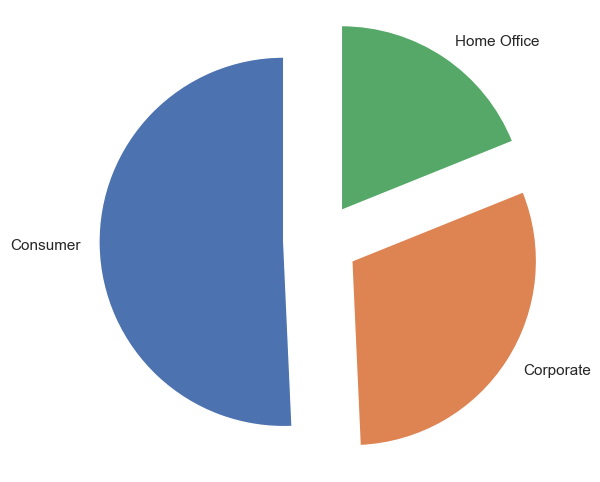

In [243]:
df_seg = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by=['Valor_Venda'], ascending=False).head(10)
df_seg.head()

plt.figure(figsize = (16, 6))

plt.pie(df_seg['Valor_Venda'], explode=(0.2,0.2,0.2), labels=df_seg['Segmento'], startangle=90)

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [244]:
df_ano_seg_ven = df_dsa[['Data_Pedido', 'Segmento', 'Valor_Venda']]
df_ano_seg_ven['Data_Pedido'] = df_ano_seg_ven['Data_Pedido'].str.split('/').str[2]
df_ano_seg_ven.groupby(['Data_Pedido', 'Segmento'])['Valor_Venda'].sum()

C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\2227949218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano_seg_ven['Data_Pedido'] = df_ano_seg_ven['Data_Pedido'].str.split('/').str[2]


Data_Pedido  Segmento   
2015         Consumer       256719.9166
             Corporate      125819.5957
             Home Office     88229.0878
2016         Consumer       265295.2593
             Corporate      114643.1229
             Home Office     74134.1332
2017         Consumer       288459.5572
             Corporate      203266.7398
             Home Office    103639.6270
2018         Consumer       323359.6019
             Corporate      235502.7284
             Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [245]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [246]:
df_dsa['Desonto_valor'] = df_dsa['Valor_Venda'] - (df_dsa['Desconto'] * df_dsa['Valor_Venda'])

In [247]:
df_antes_15_desc = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']
df_antes_15_desc.mean()

np.float64(2116.8078153172864)

In [248]:
df_depois_15_desc = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Desonto_valor']
df_depois_15_desc.mean()

np.float64(1799.2866430196934)

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [249]:
df_ano_mes_seg_ven = df_dsa[['Data_Pedido', 'Segmento', 'Valor_Venda']]
df_ano_mes_seg_ven['Data_Pedido'] = pd.to_datetime(df_ano_mes_seg_ven['Data_Pedido'], dayfirst=True)
df_ano_mes_seg_ven['Ano'] = df_ano_mes_seg_ven['Data_Pedido'].dt.year
df_ano_mes_seg_ven['Mes'] = df_ano_mes_seg_ven['Data_Pedido'].dt.month
df_ano_mes_seg_ven

C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\3989326336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano_mes_seg_ven['Data_Pedido'] = pd.to_datetime(df_ano_mes_seg_ven['Data_Pedido'], dayfirst=True)
C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\3989326336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano_mes_seg_ven['Ano'] = df_ano_mes_seg_ven['Data_Pedido'].dt.year
C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\3989326336.py:4: SettingWithCopyWarning: 
A 

,Data_Pedido,Segmento,Valor_Venda,Ano,Mes
0,2017-11-08,Consumer,261.9600,2017,11
1,2017-11-08,Consumer,731.9400,2017,11
2,2017-06-12,Corporate,14.6200,2017,6
3,2016-10-11,Consumer,957.5775,2016,10
4,2016-10-11,Consumer,22.3680,2016,10
...,...,...,...,...,...
9695,2018-12-15,Consumer,22.8300,2018,12
9696,2018-12-15,Consumer,54.3200,2018,12
9697,2018-12-15,Consumer,196.7760,2018,12
9698,2017-10-30,Consumer,3.6200,2017,10


In [250]:
df_final = df_ano_mes_seg_ven.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
df_final

C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\2299708833.py:1: FutureWarning: The provided callable <function sum at 0x00000210AFAF7100> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_final = df_ano_mes_seg_ven.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\2299708833.py:1: FutureWarning: The provided callable <function mean at 0x00000210AFB18540> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_final = df_ano_mes_seg_ven.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_1408\2299708833.py:1: FutureWarning: The provided callable <function median

sum        mean  median
Segmento    Ano  Mes                               
Consumer    2015 1     6896.629  146.736787  36.440
                 2     3167.854  117.327926  22.776
                 3    11869.304  152.170564  49.172
                 4     9108.612  189.762750  49.875
                 5    12628.271  191.337439  56.910
...                         ...         ...     ...
Home Office 2018 8     5813.300  176.160606  71.980
                 9    19183.826  249.140597  63.686
                 10   29705.515  412.576597  48.075
                 11   24009.384  247.519423  56.560
                 12   13022.391  224.523983  49.260

[144 rows x 3 columns]

In [251]:
# Vamos extrair os níveis
anos = df_final.index.get_level_values(0)
meses = df_final.index.get_level_values(1)
segmentos = df_final.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

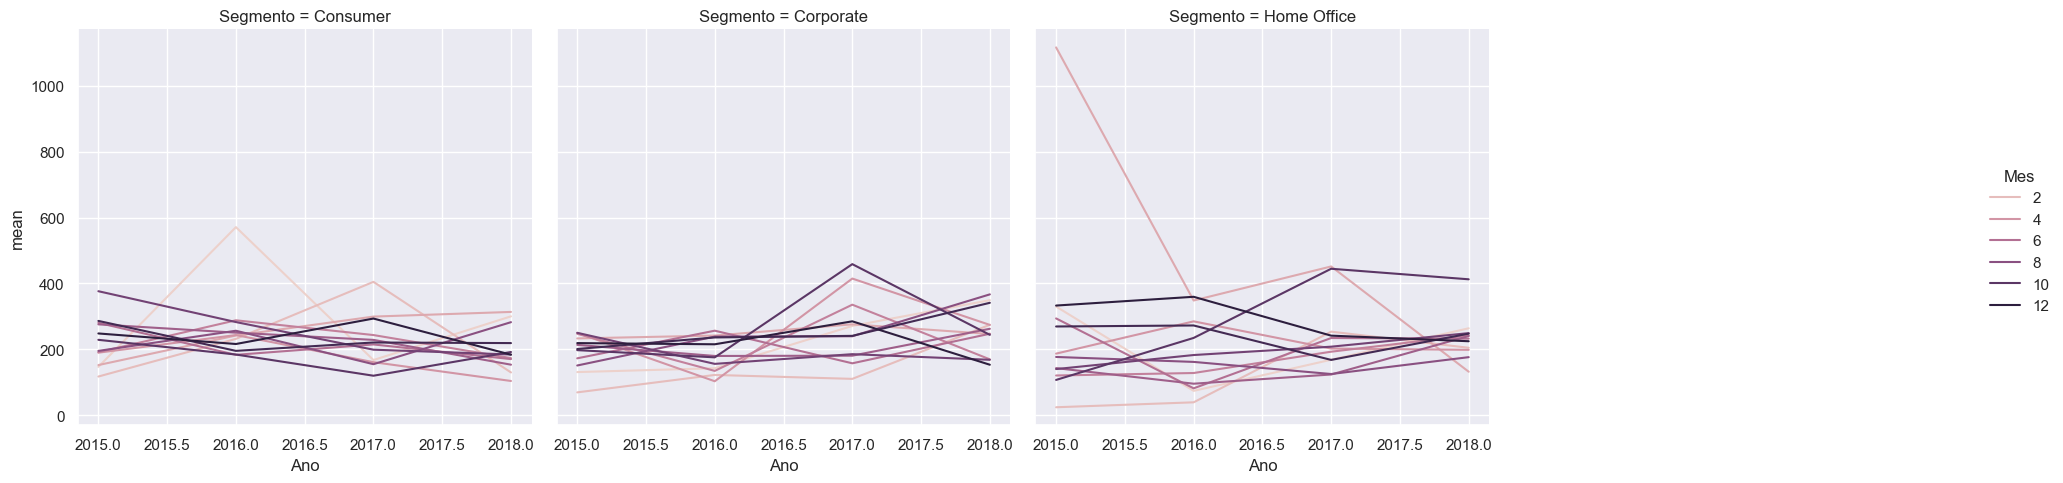

In [252]:
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_final, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [253]:
df_dsa_p10 = df_dsa.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

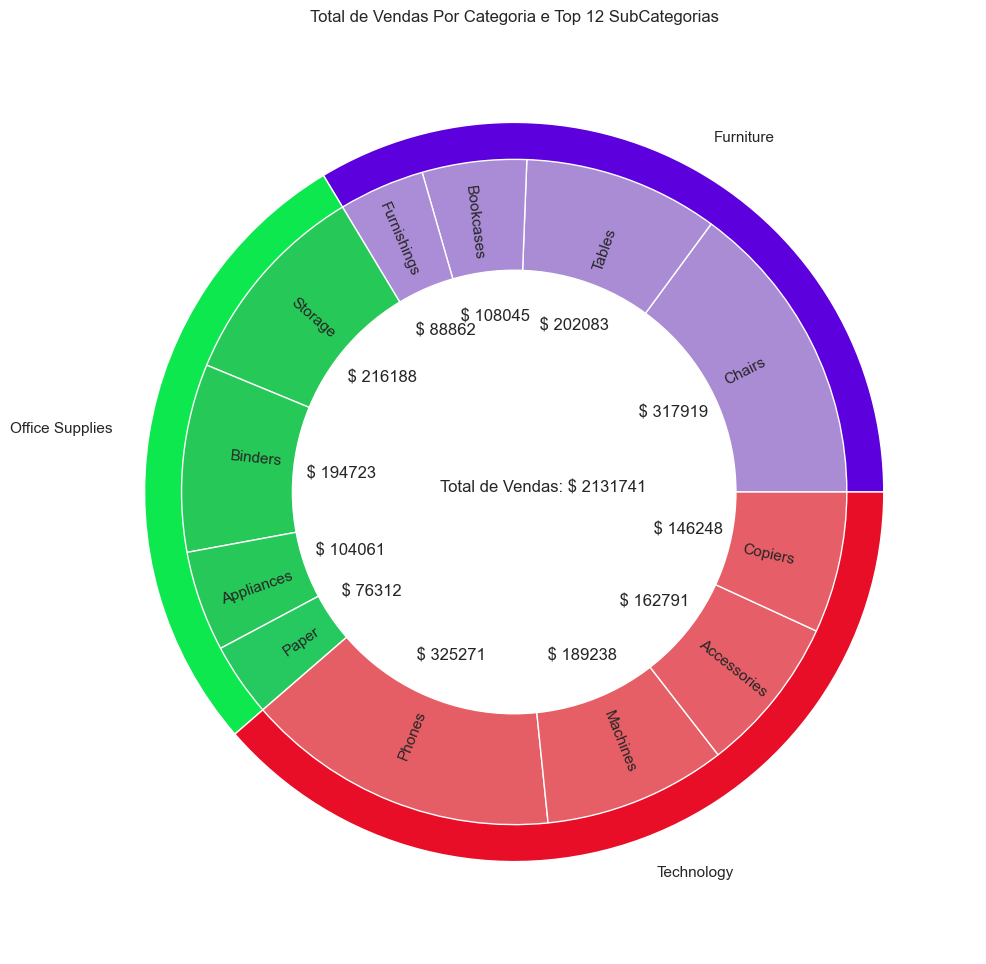

In [254]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

# Plot

# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim